In [1]:
from bio import Animal, AnimalDraw
from ipywidgets import interact


def animal(seed, length, gradation, straightness, distribution, leg_count, ground):
    a = Animal.from_params(length, gradation / 10, straightness / 100, distribution / 10, min(leg_count, length - 1), seed)
    return AnimalDraw(a).draw(150, ground=ground)


interact(animal, seed=(1, 999999), length=(7, 15),
         gradation=(2.0, 500.), straightness=(1.0, 500.0), distribution=(50.0, 500.0), leg_count=(1, 4),
         ground=(0, 300))


interactive(children=(IntSlider(value=500000, description='seed', max=999999, min=1), IntSlider(value=11, desc…

<function __main__.animal(seed, length, gradation, straightness, distribution, leg_count, ground)>

(Vector2(0.9914038775279223, 0.23000878656941903), 0.0)
(Vector2(0.9489204945803241, 0.4440621924923701), 0.009401521594589792)
(Vector2(1.0079710041088987, 0.27356546627834877), 0.0)
(Vector2(1.0817233744265389, 0.5326615245793952), 0.012008422944992114)


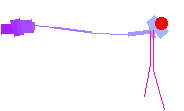

In [2]:
from bio import Animal, AnimalDraw, AnimalGenerator
from random import randint

AnimalDraw(AnimalGenerator.mamal(randint(0, 10000000))).draw(150)